Team ID : PNT2022TMID29450

Project Title : A Gesture-based Tool for Sterile Browsing of Radiology Images.

Model Testing

In [28]:
import numpy as np  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")

path = r'/content/drive/MyDrive/test-20221106T023808Z-001/test/0/0.jpg'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/train-20221106T023729Z-001/train',
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='grayscale',
                                            class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/test-20221106T023808Z-001/test',
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='grayscale',
                                          class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


Populating the interactive namespace from numpy and matplotlib


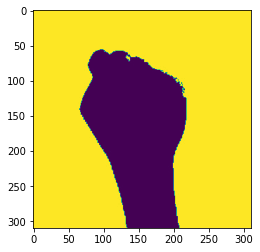

In [29]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [31]:
#loading of the image
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)#image to array
x.shape

(64, 64, 1)

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
type(x)

numpy.ndarray

In [34]:
#changing the shape
x = np.expand_dims(x,axis = 0)

In [35]:
x.shape

(1, 64, 64, 1)

In [36]:
pred = model.predict(x)
pred

1/1 [==============================] - 0s 90ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
x_test.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [38]:
index=['0','1','2','3','4','5']

In [39]:
index[np.argmax(pred)]

'0'